In [47]:
import torch
import random
import os, shutil, glob
import numpy as np
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from pathlib import Path

### Create the directories

In [48]:
art_image_dir = '../../datasets/art'
if not os.path.exists(os.path.join(art_image_dir, 'train')):
    os.mkdir(os.path.join(art_image_dir, 'train'))
    os.mkdir(os.path.join(art_image_dir, 'train', 'ai-generated'))
    os.mkdir(os.path.join(art_image_dir, 'train', 'web-scraping'))
if not os.path.exists(os.path.join(art_image_dir, 'test')):
    os.mkdir(os.path.join(art_image_dir, 'test'))
    os.mkdir(os.path.join(art_image_dir, 'test', 'ai-generated'))
    os.mkdir(os.path.join(art_image_dir, 'test', 'web-scraping'))
if not os.path.exists(os.path.join(art_image_dir, 'validation')):
    os.mkdir(os.path.join(art_image_dir, 'validation'))
    os.mkdir(os.path.join(art_image_dir, 'validation', 'ai-generated'))
    os.mkdir(os.path.join(art_image_dir, 'validation', 'web-scraping'))


In [49]:
ai_images_dir = os.path.join('../../datasets/AiArtData')
real_images_dir =  os.path.join('../../datasets/RealArt')


### Remove the zone identifier files

In [50]:
pattern = '*:Zone.Identifier'
full_pattern = os.path.join(ai_images_dir, pattern)
files_to_delete = glob.glob(full_pattern)
for ai_file in os.listdir(ai_images_dir):
    if os.path.join(ai_images_dir, ai_file) in files_to_delete:
        os.remove(os.path.join(ai_images_dir, ai_file))
for real_file in os.listdir(real_images_dir):
    if os.path.join(real_images_dir, real_file) in files_to_delete:
        os.remove(os.path.join(real_images_dir, real_file))

### Remove files without extensions

In [51]:
for file in os.listdir(ai_images_dir):
    file, file_extension = os.path.splitext(file)
    if file_extension == '':
        os.remove(os.path.join(ai_images_dir, file))
for file in os.listdir(real_images_dir):
    file, file_extension = os.path.splitext(file)
    if file_extension == '':
        os.remove(os.path.join(real_images_dir, file))

### Convert the images to a standard format - PNG

In [52]:
directories =[ai_images_dir, real_images_dir]
for folder in os.listdir(art_image_dir):
    folder_path = os.path.join(art_image_dir, folder)
    if os.path.join(art_image_dir, folder) in directories:
        for file in tqdm(os.listdir(folder_path)):
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.gif'):
                file_path = os.path.join(folder_path, file)
                img = Image.open(file_path)
                new_file_name = os.path.splitext(file_path)[0] + '.png'
                img.save(new_file_name, 'PNG')

### Remove Duplicates

In [53]:
for folder in os.listdir(art_image_dir):
    folder_path = os.path.join(art_image_dir, folder)
    if os.path.join(art_image_dir, folder) in directories:
        for file in tqdm(os.listdir(folder_path)):
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.gif'):
                file_path = os.path.join(folder_path, file)
                os.remove(file_path)
                print(f"Removed: {file_path}")

## Resize the images while maintaining aspect ratio

In [54]:
width = 800
for folder in os.listdir(art_image_dir):
    if os.path.join(art_image_dir, folder) in directories:
        folder_path = os.path.join(art_image_dir, folder)
        print("----working on folder----", folder_path)
        for file in tqdm(os.listdir(folder_path)):
            img = Image.open(os.path.join(folder_path, file))
            aspect_ratio = img.width / img.height
            height = int(width / aspect_ratio)
            if img.size[0] != width:
                resized_image = img.resize((width, height))
                resized_image.save(os.path.join(folder_path, file))



### Copy 70% of data to train, 20% to test, 10% to validation

In [55]:
aiart_data_dir = '../../datasets/AiArtData'
real_art_dir = '../../datasets/RealArt'

# Set the destination directory
ai_train_dir = '../../datasets/art/train/ai-generated'
real_train_dir = '../../datasets/art/train/web-scraping'
ai_test_dir = '../../datasets/art/test/ai-generated'
real_test_dir = '../../datasets/art/test/web-scraping'
ai_val_dir = '../../datasets/art/validation/ai-generated'
real_val_dir = '../../datasets/art/validation/web-scraping'


# Get the list of files in the AI Art Data directory
aiart_files = os.listdir(aiart_data_dir)

# Get the list of files in the Real Art directory
real_art_files = os.listdir(real_art_dir)

# Calculate the number of files to copy from each directory
aiart_train_count = int(0.7 * len(aiart_files))
real_art_train_count = int(0.7 * len(real_art_files))

aiart_test_count = int(0.2 * len(aiart_files))
real_art_test_count = int(0.2 * len(real_art_files))

aiart_val_count = int(0.1 * len(aiart_files))
real_art_val_count = int(0.1 * len(real_art_files))


# Randomly select the files to copy from the AI Art Data directory
aiart_train_files = aiart_files[:aiart_train_count]
real_train_files = real_art_files[:real_art_train_count]

aiart_test_files = aiart_files[aiart_train_count:aiart_train_count + aiart_test_count]
real_test_files = real_art_files[real_art_train_count:real_art_train_count + real_art_test_count]

aiart_val_files = aiart_files[aiart_train_count + aiart_test_count:]
real_val_files = real_art_files[real_art_train_count + real_art_test_count:]

for file in aiart_train_files:
    src = os.path.join(aiart_data_dir, file)
    dst = os.path.join(ai_train_dir, file)
    shutil.copy(src, dst)

for file in aiart_test_files:
    src = os.path.join(aiart_data_dir, file)
    dst = os.path.join(ai_test_dir, file)
    shutil.copy(src, dst)

for file in aiart_val_files:
    src = os.path.join(aiart_data_dir, file)
    dst = os.path.join(ai_val_dir, file)
    shutil.copy(src, dst)

# Copy the files from the Real Art directory to the training directory
for file in real_train_files:
    src = os.path.join(real_art_dir, file)
    dst = os.path.join(real_train_dir, file)
    shutil.copy(src, dst)

for file in real_test_files:
    src = os.path.join(real_art_dir, file)
    dst = os.path.join(real_test_dir, file)
    shutil.copy(src, dst)

for file in real_val_files:
    src = os.path.join(real_art_dir, file)
    dst = os.path.join(real_val_dir, file)
    shutil.copy(src, dst)


In [56]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [57]:
!nvidia-smi

Sun Apr 14 21:08:58 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.60.01              Driver Version: 551.76         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 Ti     On  |   00000000:01:00.0 Off |                  N/A |
| 35%   41C    P8             28W /  400W |     699MiB /  12288MiB |      8%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [58]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filesnames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filesnames)} images in '{dirpath}'")

walk_through_dir(art_image_dir)

There are 3 directories and 0 images in '../../datasets/art'
There are 2 directories and 0 images in '../../datasets/art/train'
There are 0 directories and 378 images in '../../datasets/art/train/ai-generated'
There are 0 directories and 609 images in '../../datasets/art/train/web-scraping'
There are 2 directories and 0 images in '../../datasets/art/test'
There are 0 directories and 108 images in '../../datasets/art/test/ai-generated'
There are 0 directories and 174 images in '../../datasets/art/test/web-scraping'
There are 2 directories and 0 images in '../../datasets/art/validation'
There are 0 directories and 54 images in '../../datasets/art/validation/ai-generated'
There are 0 directories and 88 images in '../../datasets/art/validation/web-scraping'


### Examine the Data

In [59]:
image_dir = Path('../../datasets/art')
train_dir = Path('../../datasets/art/train')
test_dir = Path('../../datasets/art/test')
val_dir = Path('../../datasets/art/validation')

Random AI art image path: ../../datasets/art/train/ai-generated/56428422_1662474478_web.png
Random AI art image class: ai-generated
Random AI art image height: 574
Random AI art image width: 800


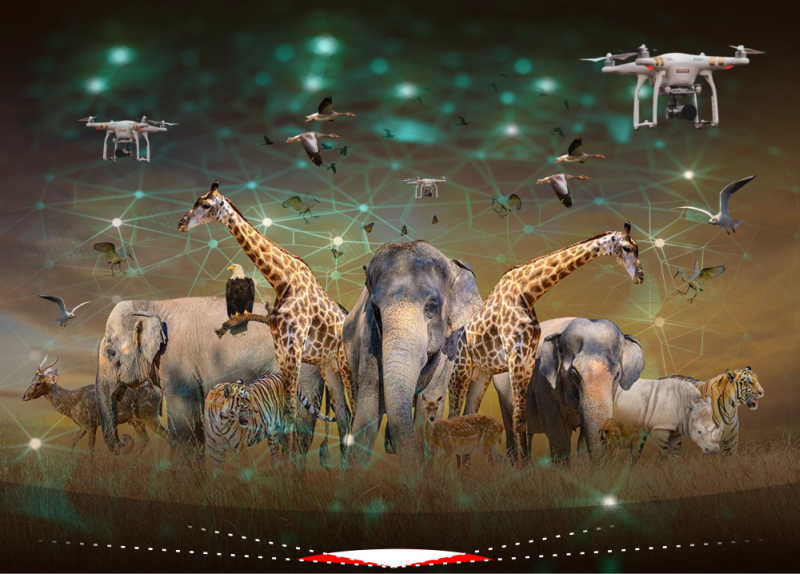

In [60]:
image_path_list = list(image_dir.glob('*/*/*png'))
rand_image_path = random.choice(image_path_list)
image_class = rand_image_path.parent.stem
img = Image.open(rand_image_path)
print(f"Random AI art image path: {rand_image_path}")
print(f"Random AI art image class: {image_class}")
print(f"Random AI art image height: {img.height}")
print(f"Random AI art image width: {img.width}")
img


(-0.5, 799.5, 573.5, -0.5)

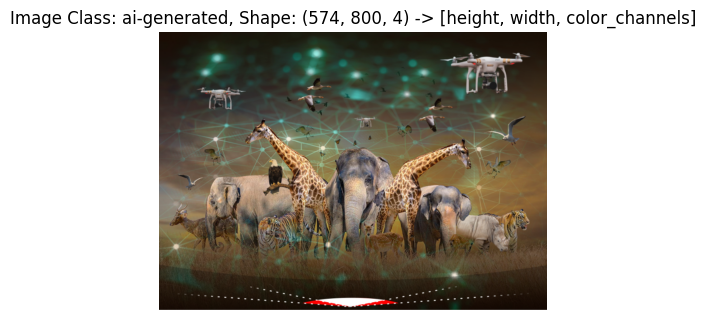

In [61]:
img_as_array = np.array(img)
plt.figure(figsize=(5,5))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class}, Shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)